### WEIGHTED RESIDUAL METHODS

### COLLOCATION METHOD

We seek an approximate solution $u_{app}(x) = \sum_{i=1}^{n} a_i \phi_i(x)$ to a differential equation

$$ \mathcal{L}[u] = f \quad \text{in } \Omega, \qquad \mathcal{B}[u] = 0 \ \text{on } \partial\Omega $$.


The **residual** is

$$ R(x; \mathbf{a}) = \mathcal{L}[u_{app}](x) - f(x). $$

The **least-squares** method chooses $\mathbf a$ to minimize the residual energy

$$
J(\mathbf a)=\int_\Omega R(x;\mathbf a)^2\,dx.
$$

Stationarity $\partial J/\partial a_i=0$ gives the equations

$$ \int_\Omega R\,\frac{\partial R}{\partial a_i}\,dx=0 \quad\Rightarrow\quad \sum_{j=1}^{n} a_j \int_\Omega \big(\mathcal L\phi_j\big)\big(\mathcal L\phi_i\big)\,dx = \int_\Omega f\,\mathcal L\phi_i\,dx,\qquad i=1,\dots,n. $$

Define $$ A_{ij}=\int_\Omega \big(\mathcal L\phi_j\big)\big(\mathcal L\phi_i\big)\,dx,\qquad
r_i=\int_\Omega f\,\mathcal L\phi_i\,dx, $$
then solve the system 

$$ \mathbf A\,\mathbf a = \mathbf r $$.


**Boundary conditions:** If $\phi_j$ already satisfy the essential BCs, they are enforced strongly. Otherwise, enforce BCs by augmentation (e.g., penalty, Lagrange multipliers) or build them into $\phi_j$.

---

### Example

Apply the least squares method on [0,1]:

$$ u'' + u = x, \qquad u(0)=0,\; u(1)=0. $$

In [1]:
import sympy
from sympy import symbols
from sympy.plotting import plot

In [3]:
x = symbols('x')
L = 1

In [5]:
a0, a1, a2 = symbols('a0 a1 a2')
phi0, phi1, phi2 = symbols('phi0 phi1 phi2')

In [7]:
phi0 = 1
phi1 = x
phi2 = x**2
phi3 = x**3

In [9]:
u_app = a0*phi0 + a1*phi1 + a2*phi2

In [11]:
BC1 = u_app.subs(x,0)
BC2 = u_app.subs(x,1)

In [13]:
u_app

a0 + a1*x + a2*x**2

In [15]:
BC_sol = sympy.solve([BC1,BC2],[a0,a1])

In [17]:
BC_sol

{a0: 0, a1: -a2}

In [19]:
u_app = u_app.subs(a0,BC_sol[a0])
u_app = u_app.subs(a1,BC_sol[a1])

In [21]:
u_app

a2*x**2 - a2*x

In [23]:
R = sympy.diff(sympy.diff(u_app,x),x)+u_app-x
LHS1 = sympy.integrate(sympy.diff(R,a2)*R,(x,0,L))

In [25]:
eq_sol = sympy.solve([LHS1],[a2])

In [27]:
eq_sol

{a2: 55/202}

In [29]:
u_app = u_app.subs(a2,eq_sol[a2])

In [31]:
u_app

55*x**2/202 - 55*x/202

In [33]:
from sympy import symbols, Function, dsolve
import sympy
import matplotlib.pyplot as plt
x = symbols('x')
u_true = Function('u')(x)

In [35]:
up = u_true.diff(x)
upp = up.diff(x)
eqn = upp + u_true - x

In [37]:
u_true = dsolve(eqn, ics={u_true.subs(x,0):0, u_true.subs(x,L):0})

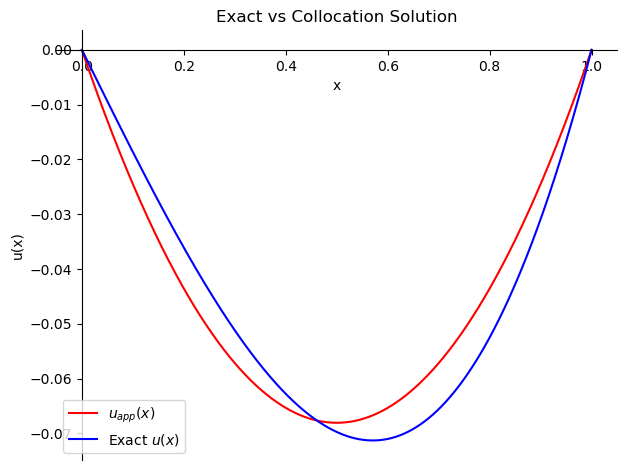

In [39]:
plt = plot( (u_app, (x, 0, L)), (u_true.rhs, (x, 0, L)), show=False)
#
plt[0].line_color = 'red'
plt[0].label = '$u_{app}(x)$'
plt[1].line_color = 'blue'
plt[1].label = 'Exact $u(x)$'
#
plt.legend = True
plt.title = 'Exact vs Collocation Solution'
plt.xlabel = 'x'
plt.ylabel = 'u(x)'
plt.show()